In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('reiseversicherung.csv')
df.head()

,Agenturname,Agenturtyp,Vertriebskanal,Produktname,Leistungseintritt,Reisedauer,Reiseziel,Nettoumsatz,Kommission,Geschlecht,Alter
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


# Data Exploration

## Überblick

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Agenturname        63326 non-null  object 
 1   Agenturtyp         63326 non-null  object 
 2   Vertriebskanal     63326 non-null  object 
 3   Produktname        63326 non-null  object 
 4   Leistungseintritt  63326 non-null  object 
 5   Reisedauer         63326 non-null  int64  
 6   Reiseziel          63326 non-null  object 
 7   Nettoumsatz        63326 non-null  float64
 8   Kommission         63326 non-null  float64
 9   Geschlecht         18219 non-null  object 
 10  Alter              63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


- Nur Spalte `Geschlecht` hat np.nan


In [43]:
df.describe()

,Reisedauer,Nettoumsatz,Kommission,Alter
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


- `Reisedauer` hat nevative Werte --> Bereinigen
- `Alter` hat Spanne von 0 - 118 Jahren 
- Bei negatvien Werten in `Nettoumsatz` handelt es sich vermutlich um Discount

In [44]:
df = df[df.Reisedauer>=0] # gibt auch einträge mit Reisedauer = 0 
df.Leistungseintritt = df.Leistungseintritt.map({'No':0, 'Yes':1})
df.Geschlecht = df.Geschlecht.replace({np.nan:'X'})

/var/folders/k0/pdpm_bns0zb_5lqb4931xd7r0000gn/T/ipykernel_32239/2883402385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Leistungseintritt = df.Leistungseintritt.map({'No':0, 'Yes':1})
/var/folders/k0/pdpm_bns0zb_5lqb4931xd7r0000gn/T/ipykernel_32239/2883402385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Geschlecht = df.Geschlecht.replace({np.nan:'X'})


Insgesamt sind in dem Datensatz 1.46% aller Abschlüsse aktiviert worden.


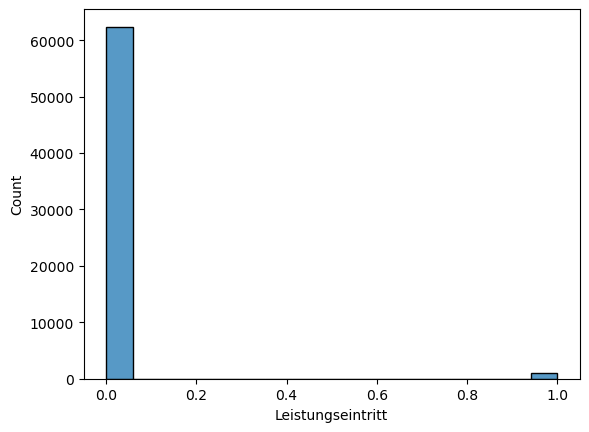

In [45]:
sb.histplot(df, x='Leistungseintritt')
print(f'Insgesamt sind in dem Datensatz {df.Leistungseintritt.sum() /df.shape[0] *100:.2f}% aller Abschlüsse aktiviert worden.')

sb.set_style("ticks")
plt.figure(figsize=(5,5))
sb.pairplot(df,hue = 'Leistungseintritt',diag_kind = "kde",kind = "scatter",palette = "colorblind", diag_kws={'common_norm': False})
plt.show()

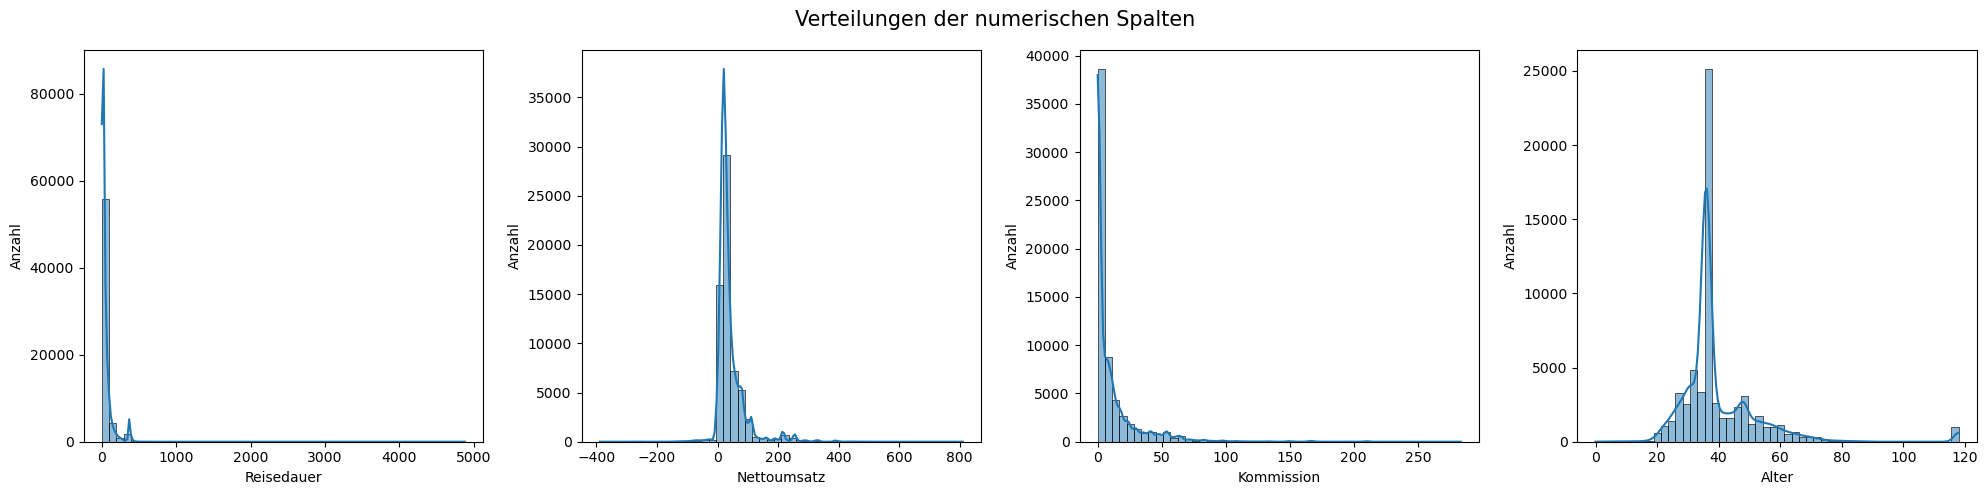

In [46]:
df_numerical = df._get_numeric_data().drop(columns='Leistungseintritt', axis=1)
fig, axs = plt.subplots(figsize =(20, 5), ncols=df_numerical.shape[1])
label_names = ['Reisedauer', ]
df_numerical
for i, ax in enumerate(axs):
    sb.histplot(df_numerical, x=df_numerical.columns[i], ax=ax, kde=True, stat='count', bins=50)
    ax.set_ylabel('Anzahl')
fig.suptitle('Verteilungen der numerischen Spalten', fontsize=15)
plt.tight_layout()

## Agenturname

In [47]:
df_plot = df.groupby('Agenturname').agg(Buchungen=('Agenturname', 'count'), Aktiviert=('Leistungseintritt', 'sum'), Ges_Kommission=('Kommission', 'sum')).sort_values(by='Buchungen', ascending=False)
df_plot['Ratio'] = df_plot.Aktiviert / df_plot.Buchungen
df_plot.head()

,Buchungen,Aktiviert,Ges_Kommission,Ratio
Agenturname,,,,
EPX,35119,195,0.00,0.005553
CWT,8580,86,277825.68,0.010023
C2B,8267,547,169747.34,0.066167
JZI,6324,31,74436.95,0.004902
SSI,1056,7,1884.84,0.006629


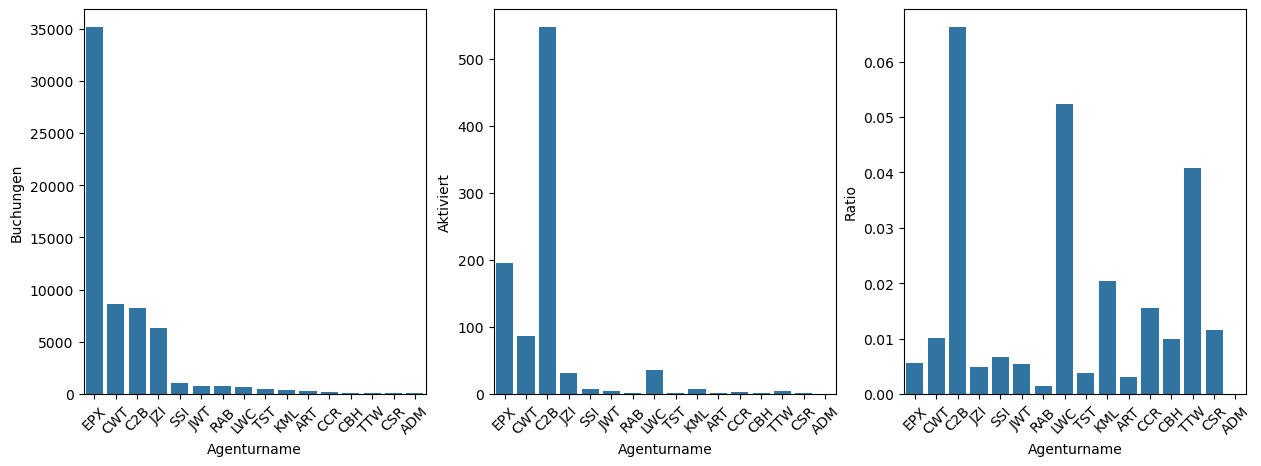

In [48]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sb.barplot(df_plot.reset_index(), x='Agenturname', y='Buchungen', ax=axs[0])
axs[0].tick_params(axis='x', rotation=45) 
sb.barplot(df_plot.reset_index(), x='Agenturname', y='Aktiviert', ax=axs[1])
axs[1].tick_params(axis='x', rotation=45) 

sb.barplot(df_plot.reset_index(), x='Agenturname', y='Ratio', ax=axs[2])
axs[2].tick_params(axis='x', rotation=45) 
plt.tight_layout
plt.show()

### Feature Engineering Agenturname
Rate die Agenturen mit Ordinal Encoding.
- Agentur mit niedrigster Aktivierungsqutoe = 1
- Agentur mit höchster Aktivierungsqutoe = 16

In [49]:
df_plot = df_plot.reset_index().sort_values(by='Ratio', ascending=True).reset_index(drop=True)
df_plot['Agentur_Rating'] = df_plot.index + 1
df = pd.merge(df, df_plot[['Agenturname','Agentur_Rating','Ges_Kommission']], on='Agenturname', how='left')
print('Kurzer Check ob Sinnvoll:')
df[['Agentur_Rating', 'Leistungseintritt', 'Ges_Kommission']].corr()

Kurzer Check ob Sinnvoll:


,Agentur_Rating,Leistungseintritt,Ges_Kommission
Agentur_Rating,1.000000,0.159615,0.589810
Leistungseintritt,0.159615,1.000000,0.075469
Ges_Kommission,0.589810,0.075469,1.000000


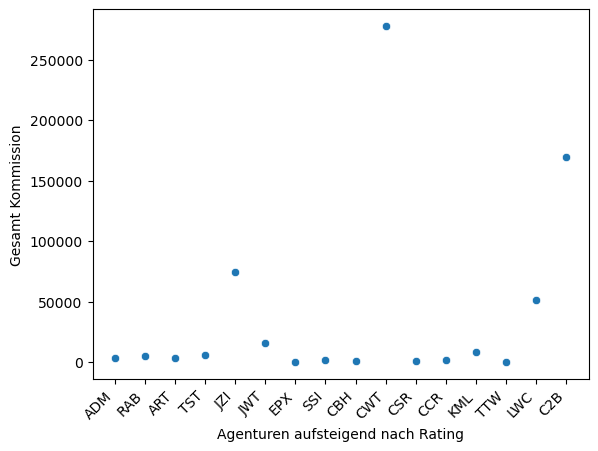

In [50]:
sb.scatterplot(df_plot, x='Agentur_Rating', y='Ges_Kommission')
plt.xticks(ticks=df_plot['Agentur_Rating'], labels=df_plot['Agenturname'], rotation=45, ha="right")
plt.ylabel('Gesamt Kommission')
plt.xlabel('Agenturen aufsteigend nach Rating')
plt.show()

## Geschlecht


/var/folders/k0/pdpm_bns0zb_5lqb4931xd7r0000gn/T/ipykernel_32239/3663530706.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{int(x * 100)}%" for x in ax[1].get_yticks()])


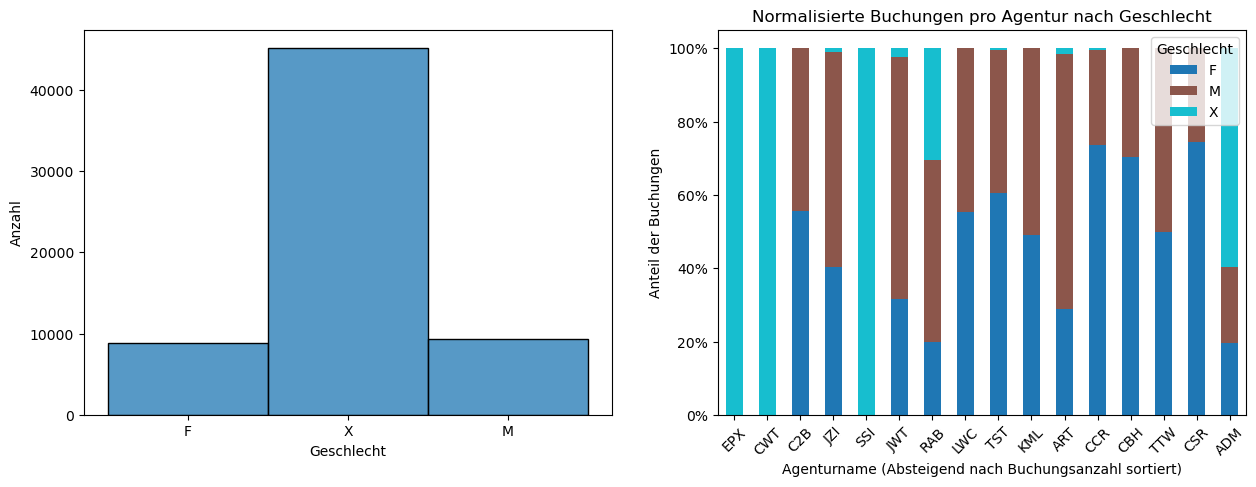

In [51]:
# Step 1: Group by Agenturname and Geschlecht and count occurrences
df_grouped = df.groupby(['Agenturname', 'Geschlecht']).size().unstack(fill_value=0)

# Step 2: Sort Agenturname by total Buchungen
df_sorted = df_plot.set_index('Agenturname').loc[df_grouped.index]  # Align both DataFrames
df_sorted = df_sorted.sort_values(by="Buchungen", ascending=False)

# Step 3: Reorder the df_grouped based on sorted Agenturname
df_grouped = df_grouped.loc[df_sorted.index]

# Step 4: Normalize to get proportions (each row sums to 1)
df_normalized = df_grouped.div(df_grouped.sum(axis=1), axis=0)



fig, ax = plt.subplots(figsize=(15, 5), ncols=2)

# Histogram in ax[0]
sb.histplot(df, x='Geschlecht', ax=ax[0])
ax[0].set_ylabel('Anzahl')

# Gestapeltes Balkendiagramm in ax[1]
df_normalized.plot(kind='bar', stacked=True, ax=ax[1], colormap="tab10")

# X-Achsen-Beschriftungen drehen (auf ax[1] bezogen)
ax[1].tick_params(axis='x', rotation=45)

# Labels und Titel auf ax[1]
ax[1].set_xlabel("Agenturname (Absteigend nach Buchungsanzahl sortiert)")
ax[1].set_ylabel("Anteil der Buchungen")
ax[1].set_title("Normalisierte Buchungen pro Agentur nach Geschlecht")

# Legende zu ax[1] hinzufügen
ax[1].legend(title="Geschlecht")

# Y-Achse auf Prozentformat setzen (auf ax[1] bezogen)
ax[1].set_yticklabels([f"{int(x * 100)}%" for x in ax[1].get_yticks()])

plt.show()


In [52]:
print(f'Alle Buchungen der beiden häufigsten Verwendeten Agenturen machen {(df[df.Agenturname.isin(['EPX', 'CWT'])].shape[0] / df.shape[0]) *100:.2f}% aller Buchungen aus und wurden ohne Geschlechtsangabe gemacht.')

Alle Buchungen der beiden häufigsten Verwendeten Agenturen machen 69.01% aller Buchungen aus und wurden ohne Geschlechtsangabe gemacht.


Aufgrund dessen, werden die Geschlechter als Spalte gedroppt, da die Information schon größtenteils im Agenturrating mit beinhaltet ist. (Passiert gesammelt weiter unten)

## Reisedauer

<Axes: xlabel='Reisedauer', ylabel='Count'>

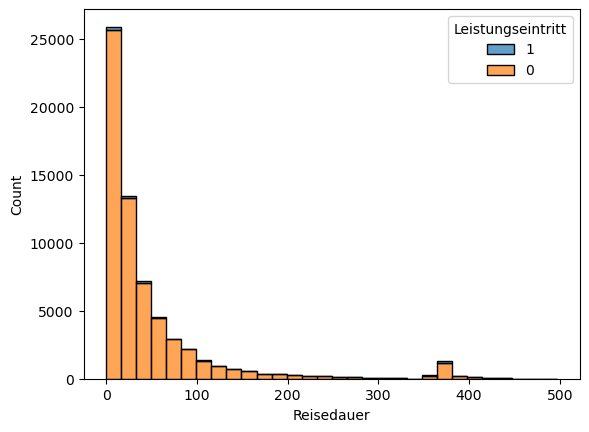

In [53]:
sb.histplot(df[df.Reisedauer < 500], x='Reisedauer', hue='Leistungseintritt', multiple="stack", bins=30, alpha=0.7,  hue_order=[1, 0])


In [54]:
from scipy.optimize import curve_fit

def parab(x, a, b,c):
    return a* x**2 + b*x + c

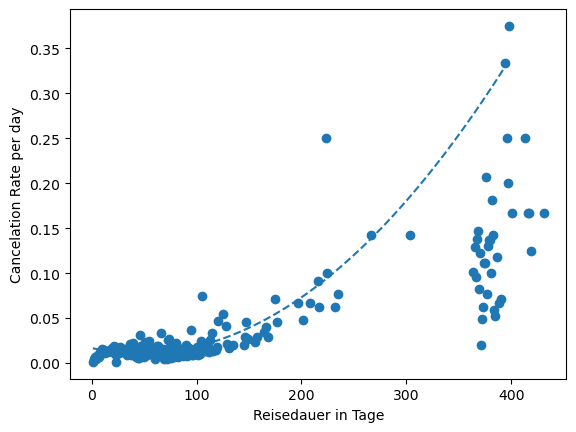

,Agenturname,Agenturtyp,Vertriebskanal,Produktname,Leistungseintritt,Reisedauer,Reiseziel,Nettoumsatz,Kommission,Geschlecht,Alter,Agentur_Rating,Ges_Kommission,pred_calc_perc
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,81,9,1013.10,0.062280
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,71,9,1013.10,0.062280
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,X,32,10,277825.68,0.011844
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,X,32,10,277825.68,0.011421
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,X,41,10,277825.68,0.013729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63316,JZI,Airlines,Online,Basic Plan,0,111,JAPAN,35.0,12.25,M,31,5,74436.95,0.021920
63317,JZI,Airlines,Online,Basic Plan,0,58,CHINA,40.0,14.00,F,40,5,74436.95,0.011289
63318,JZI,Airlines,Online,Basic Plan,0,2,MALAYSIA,18.0,6.30,M,57,5,74436.95,0.016154
63319,JZI,Airlines,Online,Basic Plan,0,3,VIET NAM,18.0,6.30,M,63,5,74436.95,0.015922


In [55]:
r = df.groupby('Reisedauer').agg(cancelations=('Leistungseintritt', 'sum'),
                                          total_entries=('Leistungseintritt', 'count'))
r.reset_index(inplace=True)
r['perc_canc'] = r.cancelations/r.total_entries
r = r[(r.perc_canc>0)& (r.Reisedauer<10000)]
plt.scatter(r.Reisedauer, r.perc_canc)
plt.xlabel('Reisedauer in Tage')
plt.ylabel('Cancelation Rate per day')
days_cut_off = 300
popt, pcov = curve_fit(parab,r.Reisedauer[r.Reisedauer<days_cut_off], r.perc_canc[r.Reisedauer<days_cut_off] )
x = np.arange(1, 400)
y = parab(x, *popt)
plt.plot(x, y, linestyle='--', label='fit_func')
plt.show()

df['pred_calc_perc'] = np.where(df.Reisedauer<days_cut_off, parab(df.Reisedauer, *popt), 0.01)
df

## Reiseziel

In [56]:
df_reise = df.groupby('Reiseziel').agg(Buchungen=('Reiseziel', 'count'), Leistungseintritt=('Leistungseintritt', 'sum'), Anzahl=('Reiseziel', 'count')).sort_values(by='Buchungen', ascending=False)
df_reise['Reise_Ratio'] = df_reise.Leistungseintritt / df_reise.Buchungen*100
df_reise.sort_values(by='Leistungseintritt', ascending=False).head(25)
df_reise['Reise_oftBesucht'] = np.where(df_reise.Anzahl >1000., 1, 0)

df_reise

,Buchungen,Leistungseintritt,Anzahl,Reise_Ratio,Reise_oftBesucht
Reiseziel,,,,,
SINGAPORE,13255,562,13255,4.239909,1
MALAYSIA,5929,23,5929,0.387924,1
THAILAND,5894,34,5894,0.576858,1
CHINA,4795,46,4795,0.959333,1
AUSTRALIA,3694,38,3694,1.028695,1
...,...,...,...,...,...
SEYCHELLES,1,0,1,0.000000,0
SENEGAL,1,0,1,0.000000,0
'KOREA DEMOCRATIC PEOPLE'S REPUBLIC OF',1,0,1,0.000000,0


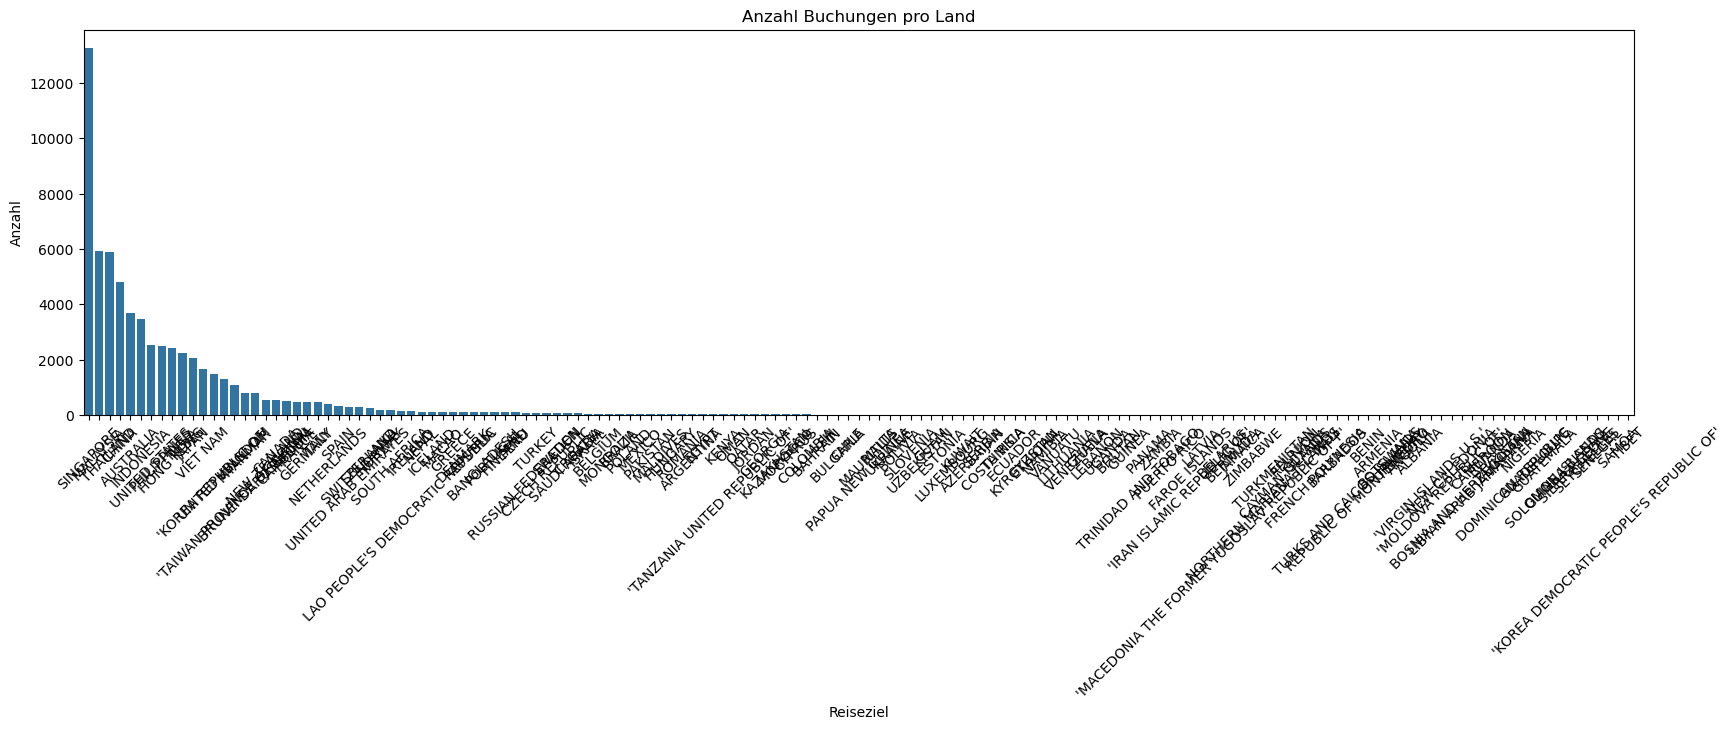

In [57]:
fig, ax= plt.subplots(figsize=(20, 5))

sb.barplot(df_reise.reset_index(), x='Reiseziel',y='Anzahl', ax=ax)
ax.tick_params(axis='x', rotation=45) 
ax.set_title('Anzahl Buchungen pro Land')
plt.show()

Die `Reise_Ratio` weist eine höhere Korrelation als manche Grundfeatures auf, deswegen ersetze ich das `Reiseziel` dadurch. 

In [58]:
df = pd.merge(df, df_reise.reset_index()[['Reiseziel','Reise_Ratio', 'Reise_oftBesucht']], on='Reiseziel', how='left')
df.head()

,Agenturname,Agenturtyp,Vertriebskanal,Produktname,Leistungseintritt,Reisedauer,Reiseziel,Nettoumsatz,Kommission,Geschlecht,Alter,Agentur_Rating,Ges_Kommission,pred_calc_perc,Reise_Ratio,Reise_oftBesucht
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,81,9,1013.10,0.062280,0.387924,1
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186,MALAYSIA,-29.0,9.57,F,71,9,1013.10,0.062280,0.387924,1
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65,AUSTRALIA,-49.5,29.70,X,32,10,277825.68,0.011844,1.028695,1
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60,AUSTRALIA,-39.6,23.76,X,32,10,277825.68,0.011421,1.028695,1
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79,ITALY,-19.8,11.88,X,41,10,277825.68,0.013729,1.978022,0


## Produktname
Der Produktname ist für jede Agentur unterschiedlich. Da die Agentur schon geratet ist, verwende ich kein erneutes Rating, sondern füge als Feature die Komission des Programms als Feature hinzu. 

In [59]:
df_prod = df.groupby('Produktname').agg(Prod_mean=('Kommission', 'mean')).reset_index()


In [60]:
df = pd.merge(df, df_prod, on='Produktname', how='left')
df[['Leistungseintritt', 'Prod_mean']].corr()

,Leistungseintritt,Prod_mean
Leistungseintritt,1.00000,0.09652
Prod_mean,0.09652,1.00000


## Aufbereitung für ML
Erste Versuche haben gezeigt, dass nur mit Ordinal Encoding ohne One-Hot Encoding keine guten Ergebnisse erzielt werden können

In [61]:
df['is_Airline'] = df.Agenturtyp.map({'Travel Agency':0, 'Airlines':1})
df['is_Online'] = df.Vertriebskanal.map({'Online':1, 'Offline':0})
df = pd.get_dummies(df, columns=['Agenturname', 'Agenturtyp','Produktname', 'Reiseziel'])
df.head()

,Vertriebskanal,Leistungseintritt,Reisedauer,Nettoumsatz,Kommission,Geschlecht,Alter,Agentur_Rating,Ges_Kommission,pred_calc_perc,...,Reiseziel_UNITED ARAB EMIRATES,Reiseziel_UNITED KINGDOM,Reiseziel_UNITED STATES,Reiseziel_URUGUAY,Reiseziel_UZBEKISTAN,Reiseziel_VANUATU,Reiseziel_VENEZUELA,Reiseziel_VIET NAM,Reiseziel_ZAMBIA,Reiseziel_ZIMBABWE
0,Offline,0,186,-29.0,9.57,F,81,9,1013.10,0.062280,...,False,False,False,False,False,False,False,False,False,False
1,Offline,0,186,-29.0,9.57,F,71,9,1013.10,0.062280,...,False,False,False,False,False,False,False,False,False,False
2,Online,0,65,-49.5,29.70,X,32,10,277825.68,0.011844,...,False,False,False,False,False,False,False,False,False,False
3,Online,0,60,-39.6,23.76,X,32,10,277825.68,0.011421,...,False,False,False,False,False,False,False,False,False,False
4,Online,0,79,-19.8,11.88,X,41,10,277825.68,0.013729,...,False,False,False,False,False,False,False,False,False,False


In [62]:
df.drop(columns=[ 'Geschlecht', 'Vertriebskanal'], axis=1, inplace=True)
# df.drop(columns=['Agenturname', 'Agenturtyp', 'Produktname', 'Reiseziel'], axis=1, inplace=True)

Da hier keine Datumsangaben zu finden sind, bringen uns potentiell gleiche Reisen nicht notwendigerweise mehr Information. 

In [63]:
df[df.duplicated()].head(2)

,Leistungseintritt,Reisedauer,Nettoumsatz,Kommission,Alter,Agentur_Rating,Ges_Kommission,pred_calc_perc,Reise_Ratio,Reise_oftBesucht,...,Reiseziel_UNITED ARAB EMIRATES,Reiseziel_UNITED KINGDOM,Reiseziel_UNITED STATES,Reiseziel_URUGUAY,Reiseziel_UZBEKISTAN,Reiseziel_VANUATU,Reiseziel_VENEZUELA,Reiseziel_VIET NAM,Reiseziel_ZAMBIA,Reiseziel_ZIMBABWE
287,0,56,69.0,0.0,36,7,0.0,0.011178,1.978022,0,...,False,False,False,False,False,False,False,False,False,False
302,0,3,20.0,0.0,36,7,0.0,0.015922,0.387924,1,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df.head()

,Leistungseintritt,Reisedauer,Nettoumsatz,Kommission,Alter,Agentur_Rating,Ges_Kommission,pred_calc_perc,Reise_Ratio,Reise_oftBesucht,...,Reiseziel_UNITED ARAB EMIRATES,Reiseziel_UNITED KINGDOM,Reiseziel_UNITED STATES,Reiseziel_URUGUAY,Reiseziel_UZBEKISTAN,Reiseziel_VANUATU,Reiseziel_VENEZUELA,Reiseziel_VIET NAM,Reiseziel_ZAMBIA,Reiseziel_ZIMBABWE
0,0,186,-29.0,9.57,81,9,1013.10,0.062280,0.387924,1,...,False,False,False,False,False,False,False,False,False,False
1,0,186,-29.0,9.57,71,9,1013.10,0.062280,0.387924,1,...,False,False,False,False,False,False,False,False,False,False
2,0,65,-49.5,29.70,32,10,277825.68,0.011844,1.028695,1,...,False,False,False,False,False,False,False,False,False,False
3,0,60,-39.6,23.76,32,10,277825.68,0.011421,1.028695,1,...,False,False,False,False,False,False,False,False,False,False
4,0,79,-19.8,11.88,41,10,277825.68,0.013729,1.978022,0,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df.corr().abs().Leistungseintritt.sort_values(ascending=False)[1:21]

Agenturname_C2B                   0.166246
Agentur_Rating                    0.159615
Nettoumsatz                       0.133927
Reise_Ratio                       0.124552
Produktname_Annual Silver Plan    0.120801
Reiseziel_SINGAPORE               0.118923
Agenturtyp_Travel Agency          0.098732
is_Airline                        0.098732
Agenturtyp_Airlines               0.098732
Kommission                        0.098695
Prod_mean                         0.096520
Agenturname_EPX                   0.084430
Produktname_Bronze Plan           0.081007
Produktname_Silver Plan           0.076780
Ges_Kommission                    0.075469
Reisedauer                        0.073603
Produktname_Cancellation Plan     0.066002
Produktname_Annual Gold Plan      0.043206
Agenturname_LWC                   0.032844
Reiseziel_MALAYSIA                0.028796
Name: Leistungseintritt, dtype: float64

In [66]:
df.to_csv('torch_approach_2.csv', index=False)

# Deep Learning Part
Ziel: Verwende Self-Attention in Kombination mit MLP in Bottleneck-Architektur. 




Visualisierung des Self-Attention-Mechanisums in einem einfacheren Beispiel  

<img src="animation_schnell.gif" alt="QKV-Attention" width="1100">

Gewählte Architektur:  
<img src="Architecture.png" alt="Architecture" width="500">


<img src="Loss_Curve.jpeg" alt="Loss_Curve" width="500">
<img src="Performance.png" alt="Performance" width="500">

# Herausforderungen
- Feature Engineering
- Imbalance of Data Set
- Cuda und Apple zum Laufen zu bringen

### Feature Engineering
- Fehlendes Wissen über Leistungspakete  
- Keine Angaben über Buchungsdatum und Abflugdatum (FFT - Analysis)  



<Axes: >

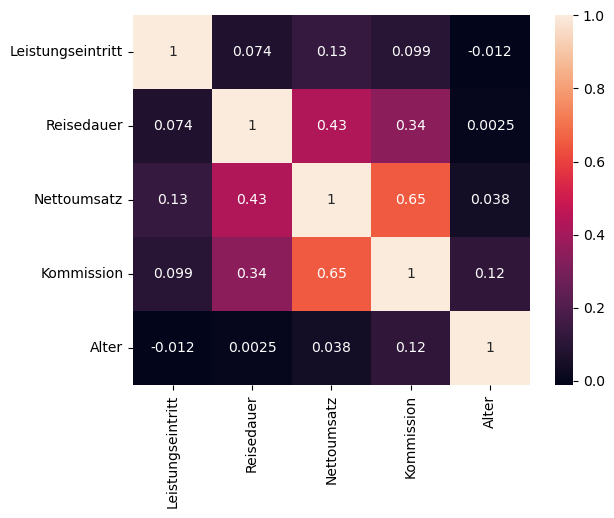

In [67]:
df_raw = pd.read_csv('reiseversicherung.csv')
df_raw.Leistungseintritt = df_raw.Leistungseintritt.map({'Yes':1, 'No':0})
sb.heatmap(df_raw._get_numeric_data().corr(), annot=True)


#### Beispiel FFT
Aufzeigen der Saisonalität bei Buchungen mit FFT aus aus Hotel Datensatz  


<img src="Beispiel_FFT-Analysis.png" alt="FFT-Analysis" width="500">
<img src="FFT-Ergebnis.png" alt="FFT-Analysis" width="500">

### Imbalance of Dataset

- Over- or Undersampling
- (manuelles Auswählen der Trainingsdaten)


# Ausblick
- Anderes Features (bei der Annahme, dass Einträge chronologisch Eingetragen wurden, kann man Gruppenbuchungen finden) --> Nicht gemacht weil bei bisheriger Datenlage nicht abgefragt wurde
- Längeres Training (Stand jetzt ca. 1h T4 GPU bei Google Colab)
- Hyperparameter Tuning

